In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [3]:
# Count of Oscar wins across all categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4

,Title,Wins
0,Titanic,12
1,Ben-Hur,11
2,The Lord of the Rings: The Return of the King,11
3,West Side Story,10
4,The Last Emperor,9
...,...,...
1268,Jacques-Yves Cousteau's World without Sun,1
1269,The Alaskan Eskimo,1
1270,The Crying Game,1
1271,Quicker 'N a Wink,1


In [4]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:

df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [6]:
# Count of Oscar nominations across all categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Moulin Rouge,15
3,Mutiny on the Bounty,15
4,All about Eve,14
...,...,...
4828,Go for Broke!,1
4829,Baptism of Fire,1
4830,A Single Life,1
4831,Lydia,1


In [7]:
# Dataframe of Oscar nomations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df.fillna(0)

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Moulin Rouge,15,4.0
3,Mutiny on the Bounty,15,1.0
4,All about Eve,14,6.0
...,...,...,...
4828,Go for Broke!,1,0.0
4829,Baptism of Fire,1,0.0
4830,A Single Life,1,0.0
4831,Lydia,1,0.0


In [8]:
df2 = pd.DataFrame(df)

In [9]:
movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [10]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [11]:
# Merge on left dataframe to keep all streaming movies
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,NaN,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [12]:
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                26
Won Best Picture    32
dtype: int64

In [13]:
combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [14]:
# Best Picture: 2 = Won, 1 = Nominated, 0 = Not Nominated
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

In [15]:
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)

# False = 0
# True = 1
# Wins
# Nominated

In [16]:
# Sort Oscar nominated movies by highest IMDb rating
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,9.0,5.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,8.0,1.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,4.0,NaN,1.0
20,There Will Be Blood,2007,18+,8.2,91%,1,0,0,0,0,Paul Thomas Anderson,Drama,United States,"English,American Sign Language",158.0,8.0,2.0,1.0
13,Room,2015,18+,8.1,93%,1,0,0,0,0,Lenny Abrahamson,"Drama,Thriller","Ireland,Canada,United Kingdom,United States",English,118.0,4.0,1.0,1.0
18,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0,12.0,4.0,2.0
19,Her,2013,18+,8.0,95%,1,0,0,0,0,Spike Jonze,"Drama,Romance,Sci-Fi",United States,English,126.0,5.0,1.0,1.0


In [17]:
combined_df
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


In [18]:
# Dataframes of each service

netflix = combined_df.loc[combined_df["Netflix"] == 1]

hulu = combined_df.loc[combined_df["Hulu"] == 1]
hulu
primevideo = combined_df.loc[combined_df["Prime Video"] == 1]
primevideo
disney = combined_df.loc[combined_df["Disney+"] == 1]
disney.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1,0,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0,1.0,0.0,0.0
103,Amy,2015,18+,7.8,95%,1,0,1,1,0,NaN,Drama,United States,English,60.0,1.0,1.0,0.0
122,Bolt,2008,7+,6.8,89%,1,0,0,1,0,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,1.0,0.0,0.0
125,The Princess and the Frog,2009,all,7.1,85%,1,0,0,1,0,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97.0,3.0,0.0,0.0
150,Miracle,2004,7+,7.5,81%,1,0,0,1,0,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135.0,0.0,0.0,0.0


In [51]:
# Oscar Nominated movies dataframe

netflix_nominations = netflix.loc[netflix["Nomination"] > 0]
hulu_nominations = hulu.loc[hulu["Nomination"] > 0]
primevideo_nominations = primevideo.loc[primevideo["Nomination"] > 0]
disney_nominations = disney.loc[disney["Nomination"] > 0]


In [52]:
# Count of award nominated movies
netflix_nom_movies = netflix_nominations["Title"].count()
hulu_nom_movies = hulu_nominations["Title"].count()
primevideo_nom_movies = primevideo_nominations["Title"].count()
disney_nom_movies = disney_nominations["Title"].count()


In [58]:
# Oscar Winning movies dataframe
netflix_wins = netflix.loc[netflix["Wins"] > 0]
hulu_wins = hulu.loc[hulu["Wins"] > 0]
primevideo_wins = primevideo.loc[primevideo["Wins"] > 0]
disney_wins = disney.loc[disney["Wins"] > 0]

netflix_win_movies = netflix_wins["Title"].count()
hulu_win_movies = hulu_wins["Title"].count()
primevideo_win_movies = primevideo_wins["Title"].count()
disney_win_movies = disney_wins["Title"].count()

In [53]:
# Nominated Best Picture
netflix_bp_nom = netflix.loc[netflix["Won Best Picture"] == 1]
hulu_bp_nom = hulu.loc[hulu["Won Best Picture"] == 1]
primevideo_bp_nom = primevideo.loc[primevideo["Won Best Picture"] == 1]
disney_bp_nom = disney.loc[disney["Won Best Picture"] == 1]

netflix_bp_nom_movies = netflix_bp_nom["Title"].count()
hulu_bp_nom_movies = hulu_bp_nom["Title"].count()
primevideo_bp_nom_movies = primevideo_bp_nom["Title"].count()
disney_bp_nom_movies = disney_bp_nom["Title"].count()

In [60]:
# Won Best Picture
netflix_bp = netflix.loc[netflix["Won Best Picture"] == 2]
hulu_bp = hulu.loc[hulu["Won Best Picture"] == 2]
primevideo_bp = primevideo.loc[primevideo["Won Best Picture"] == 2]
disney_bp = disney.loc[disney["Won Best Picture"] == 2]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

netflix_bp_win

3

In [23]:
# Bar chart count of Nominated movies


In [61]:
#  of movies that have been Nominated

# List of services to be index
ss_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

# Dataframe of wins, nominations
data = {
    'Nomination': [netflix_nom_movies, hulu_nom_movies, primevideo_nom_movies, disney_nom_movies],
    'Wins': [netflix_win_movies, hulu_win_movies, primevideo_win_movies, disney_win_movies],
    'Nominated Best Picture': [netflix_bp_nom_movies, hulu_bp_nom_movies, primevideo_bp_nom_movies, disney_bp_nom_movies],
    'Won Best Picture': [netflix_bp_win, hulu_bp_win, primevideo_bp_win, disney_bp_win],
}
ss_awards = pd.DataFrame(data, index =ss_names) 
ss_awards




,Nomination,Wins,Nominated Best Picture,Won Best Picture
Netflix,166,59,29,3
Hulu,66,19,7,1
Prime Video,377,102,18,3
Disney+,107,41,6,1


In [25]:
# Count of movies that received a Nomination
# nom_plot = plt.bar(streaming_services, streamingservice_awards["Nomination"])

# nom_plot = plt.bar(ss_names, ss_awards["Nomination"])
# win_plot = plt.bar(ss_names, ss_awards["Wins"])
# plt.ylabel("Awards")
# plt.title("Count of Oscar winning and nominatd movies")
# plt.show()


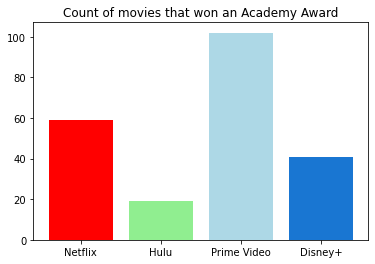

In [26]:
# Count of movies that won an Academy Award
win_plot = plt.bar(ss_names, ss_awards["Wins"], color=["red", "lightgreen", "lightblue", "#1976d2"])
plt.title("Count of movies that won an Academy Award")
plt.show()


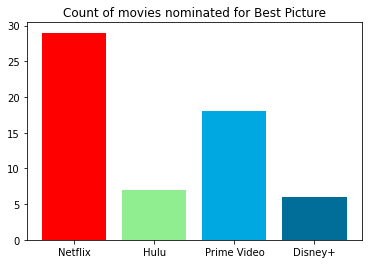

In [28]:
# Count of movies that were Nominated Best Picture
bpnom_plot = plt.bar(ss_names, ss_awards["Nominated Best Picture"], color=["red", "lightgreen", "#00A8E1", "#006e99"])

plt.title("Count of movies nominated for Best Picture")
plt.show()

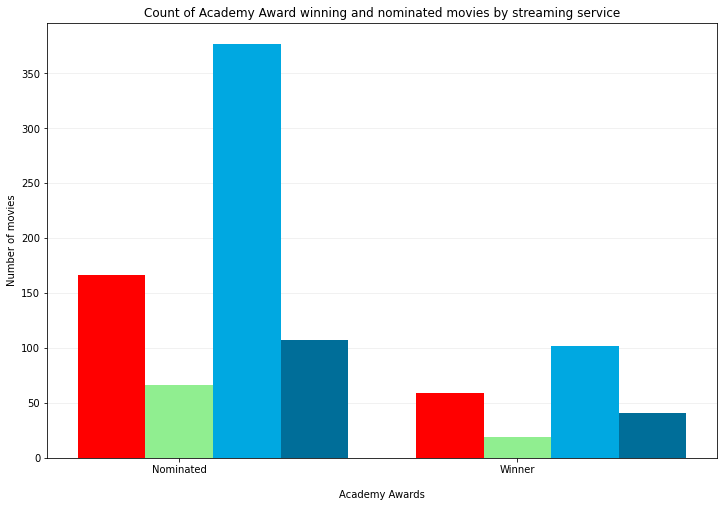

In [45]:
# Bars of award stats along x-axis
netflix_sum3 = ss_awards.iloc[0, 0:2]
hulu_sum3 = ss_awards.iloc[1, 0:2]
primevideo_sum3 = ss_awards.iloc[2, 0:2]
disney_sum3 = ss_awards.iloc[3, 0:2]

categories = ["Nomination", "Wins"]

x_axis3 = np.arange(len(categories))
bar_width = 0.2

fig, groupbars3 = plt.subplots(figsize=(12, 8))

b1 = groupbars3.bar(x_axis3, netflix_sum3, width=bar_width, label="Netflix", color="red")
b2 = groupbars3.bar(x_axis3+bar_width, hulu_sum3, width=bar_width, label="Hulu", color="lightgreen")
b3 = groupbars3.bar(x_axis3+bar_width*2, primevideo_sum3, width=bar_width, label="Prime Video", color="#00A8E1")
b4 = groupbars3.bar(x_axis3+bar_width*3, disney_sum3, width=bar_width, label="Disney+", color="#006e99")

groupbars3.set_xticks(x_axis3 + bar_width)
groupbars3.set_xticklabels(["Nominated", "Winner"])
groupbars3.set_xlabel('Academy Awards', labelpad=15)
groupbars3.set_ylabel('Number of movies')
groupbars3.set_title('Count of Academy Award winning and nominated movies by streaming service')
groupbars3.set_axisbelow(True)
groupbars3.yaxis.grid(True, color='#EEEEEE')
plt.show()


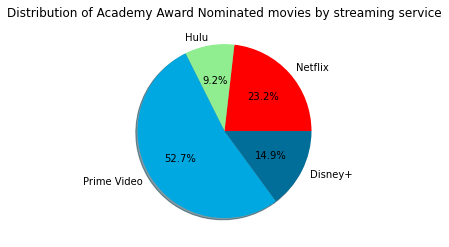

In [49]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Nomination"], labels=ss_names, colors=["red", "lightgreen", "#00A8E1", "#006e99"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award Nominated movies by streaming service")
plt.show()

In [ ]:
#########################
# Do a pie chart of genres of total movies just for each service


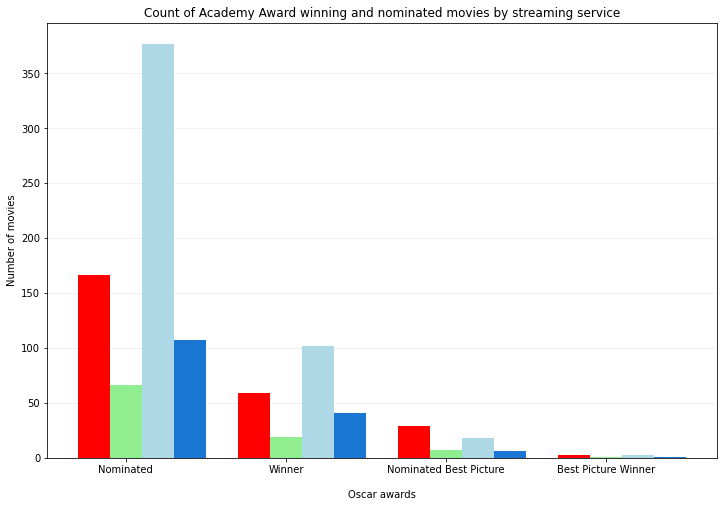

In [39]:
# Bars of award stats along x-axis
netflix_sum = ss_awards.iloc[0, 0:4]
hulu_sum = ss_awards.iloc[1, 0:4]
primevideo_sum = ss_awards.iloc[2, 0:4]
disney_sum = ss_awards.iloc[3, 0:4]

x_axis = np.arange(len(ss_names))
bar_width = 0.2

fig, groupbars = plt.subplots(figsize=(12, 8))

b1 = groupbars.bar(x_axis, netflix_sum, width=bar_width, label="Netflix", color="red")
b2 = groupbars.bar(x_axis+bar_width, hulu_sum, width=bar_width, label="Hulu", color="lightgreen")
b3 = groupbars.bar(x_axis+bar_width*2, primevideo_sum, width=bar_width, label="Prime Video", color="lightblue")
b4 = groupbars.bar(x_axis+bar_width*3, disney_sum, width=bar_width, label="Disney+", color="#1976d2")

groupbars.set_xticks(x_axis + bar_width)
groupbars.set_xticklabels(["Nominated", "Winner", "Nominated Best Picture", "Best Picture Winner"])
groupbars.set_xlabel('Oscar awards', labelpad=15)
groupbars.set_ylabel('Number of movies')
groupbars.set_title('Count of Academy Award winning and nominated movies by streaming service')
groupbars.set_axisbelow(True)
groupbars.yaxis.grid(True, color='#EEEEEE')
plt.show()

In [31]:
# plt.bar(ss_names, netflix_sum)
# plt.bar(ss_names, hulu_sum)
# plt.bar(ss_names, primevideo_sum)
# plt.bar(ss_names, disney_sum)


In [32]:
ss_awards

,Nomination,Wins,Nominated Best Picture,Won Best Picture
Netflix,166,59,29,3
Hulu,66,19,7,1
Prime Video,377,102,18,3
Disney+,107,41,6,1


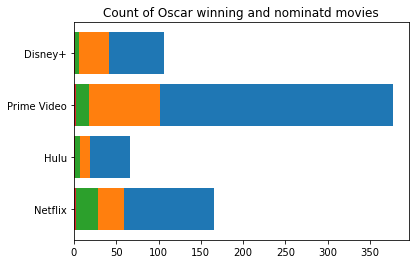

In [33]:
# Stacked columns of award stats

test1 = ss_awards["Nomination"]
test2 = ss_awards["Wins"]
test3 = ss_awards["Nominated Best Picture"]
test4 = ss_awards["Won Best Picture"]

plt.barh(ss_names, test1)
plt.barh(ss_names, test2)
plt.barh(ss_names, test3)
plt.barh(ss_names, test4)

plt.title("Count of Oscar winning and nominatd movies")
plt.show()